Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam

TensorFlow is a powerful open-source library for deep learning and machine learning, commonly used for tasks like image classification, object detection, natural language processing, and more.

ImageDataGenerator is a Keras utility within TensorFlow for generating batches of tensor image data with real-time data augmentation.
It allows you to load images in a structured way (e.g., from directories organized by class) and apply augmentations like rotations, flips, and scaling, which helps improve model generalization.

Sequential is a Keras class for creating models layer-by-layer in a simple, linear stack.
This is ideal for models where each layer has one input and one output, making it well-suited for building simple CNNs and other sequential neural networks.

Conv2D: Convolutional layer for extracting features from images. It applies convolution filters to learn spatial hierarchies in the image.

MaxPooling2D: Reduces spatial dimensions by keeping only the most relevant features, helping to prevent overfitting and reduce computational costs.

Flatten: Converts a 2D matrix into a 1D vector for fully connected layers.

Dense: Fully connected layer for learning from all features in the preceding layer, typically used for classification.

Dropout: Randomly disables a fraction of neurons in a layer to prevent overfitting and improve generalization.

MobileNetV2 is a pre-trained deep learning model in Keras that’s optimized for mobile and edge devices.
It serves as a base model in transfer learning to leverage pre-trained weights for better feature extraction in image classification, especially when the dataset is small.

Model is a Keras class that allows for more flexible model architectures than Sequential.
It enables you to define complex architectures like multiple inputs or outputs, non-sequential layers, or transfer learning models by combining custom layers with pre-trained networks.

Input: Used to specify the input shape of the model, especially when building with the Model class.

GlobalAveragePooling2D: Replaces Flatten for reducing spatial dimensions, often used in transfer learning. It averages each feature map, reducing dimensions without overfitting.

accuracy_score: Measures the proportion of correctly classified samples.

precision_score: Measures the proportion of true positives among predicted positives, useful when false positives are costly.

recall_score: Measures the proportion of true positives among actual positives, useful when false negatives are costly.

f1_score: The harmonic mean of precision and recall, providing a balanced metric especially for imbalanced datasets.

Keras is an easy-to-use deep learning API built into TensorFlow, used for building and training neural networks.
Here, it’s directly imported in case other Keras utilities or functions are needed.

Matplotlib is a popular plotting library in Python, and pyplot (plt) is its submodule for easy plotting.
In machine learning, it's often used for visualizing loss and accuracy over epochs, displaying images, and interpreting predictions with graphs.

NumPy is the foundational package for numerical computing in Python, particularly useful for manipulating large, multi-dimensional arrays and matrices.
It’s commonly used for data manipulation, mathematical calculations, and converting data structures (like lists of predictions) into arrays for analysis.

classification_report provides a detailed summary of precision, recall, F1-score, and support (number of samples per class).
It is often used to evaluate classification models and understand how well each class is performing.

Adam (Adaptive Moment Estimation) is an efficient optimization algorithm that adjusts learning rates based on the model's training progress.
It combines features of two other optimizers—AdaGrad and RMSProp—to handle sparse gradients and achieve faster convergence in training.

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# !unzip ./drive/MyDrive/tom_and_jerry_dataset.zip
!unzip -q /content/tom_and_jerry_dataset.zip -d /content/

In [5]:
dataset_path = './tom_and_jerry'
img_height, img_width = 224, 224
batch_size = 32
epochs = 20

Data Splitting

In [38]:
# Load data with splits
train_generator = keras.utils.image_dataset_from_directory(
    directory = "./tom_and_jerry",
    labels = "inferred",
    label_mode = 'binary',
    class_names = ['jerry', 'tom'],
    batch_size = 32,
    image_size = (224, 224),
    shuffle = True,
    seed = 42,
    validation_split = 0.25, # 75% of the data
    subset = 'training'
)
test_generator = keras.utils.image_dataset_from_directory(
    directory = "./tom_and_jerry",
    labels = "inferred",
    label_mode = 'binary',
    class_names = ['jerry', 'tom'],
    batch_size = 32,
    image_size = (224, 224),
    shuffle = True,
    seed = 42,
    validation_split = 0.15, # 15% of the data
    subset = 'validation'
)
validation_generator = keras.utils.image_dataset_from_directory(
    directory = "./tom_and_jerry",
    labels = "inferred",
    label_mode = 'binary',
    class_names = ['jerry', 'tom'],
    batch_size = 32,
    image_size = (224, 224),
    shuffle = True,
    seed = 42,
    validation_split = 0.1, # 10% of the data
    subset = 'validation'
)

Found 3170 files belonging to 2 classes.
Using 2378 files for training.
Found 3170 files belonging to 2 classes.
Using 475 files for validation.
Found 3170 files belonging to 2 classes.
Using 317 files for validation.


Common Parameters Across All Generators
*   directory = "./tom_and_jerry": This specifies the root directory containing the image dataset. Inside this directory, subdirectories named jerry and tom contain images for each class.

*   labels = "inferred": This tells Keras to infer labels from the subdirectory names (e.g., images in ./tom_and_jerry/jerry are labeled as “jerry” and images in ./tom_and_jerry/tom are labeled as “tom”).

*   label_mode = 'binary': This indicates that the labels should be binary, which is appropriate for binary classification. Images in the "jerry" class are assigned one label, and those in the "tom" class get the other.

*   class_names = ['jerry', 'tom']: Specifies the class names manually in the order you want. This order will affect the label encoding (e.g., "jerry" might be 0 and "tom" might be 1).

*   batch_size = 32: Sets the number of images to be returned per batch when iterating over the dataset.

*   image_size = (224, 224): Resizes each image to 224x224 pixels. This is a standard input size for many CNN models, especially MobileNet, which expects 224x224 inputs.

*   shuffle = True: Ensures that the images are randomly shuffled within the generator, which is important for training to improve generalization.

*   seed = 42: Sets the random seed for reproducibility, ensuring that the split into training, testing, and validation subsets is the same each time the code is run.

Unique Parameters for Each Generator

*   validation_split: This controls the proportion of images to be set aside as part of a validation subset.

*   Training set: validation_split = 0.25 (75% of the data will be used for training)
Test set: validation_split = 0.15 (15% of the data will be used for testing)
Validation set: validation_split = 0.1 (10% of the data will be used for validation)

*   subset: Indicates whether to use the “training” or “validation” part of the split. For the training set generator, subset = 'training' (75% of the data).
For the test set and validation set generators, subset = 'validation' (15% and 10% of the data, respectively).

Explanation of Each Generator

*   train_generator: Loads 75% of the images in the directory (after shuffling) for training. Resizes each image to 224x224 pixels and uses binary labels.
*   test_generator: Loads 15% of the images for testing. This generator will also resize and label the images accordingly.

*   validation_generator: Loads 10% of the images for validation. This generator, like the others, applies resizing and binary labeling.

**CNN Model (Untrained Model)**

In [39]:
# Adjusted CNN Model
model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),  # Increased dropout for regularization
    Dense(1, activation='sigmoid')
])

# Compile with a lower learning rate
model_simple.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_simple.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

1. Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))
- Layer Type: Convolutional Layer
- Filters: 32 convolutional filters, each of size 3x3.
- Activation: 'relu' (Rectified Linear Unit) activation function, which introduces non-linearity into the model, helping it learn complex patterns.
- Input Shape: (224, 224, 3) indicates the input image size is 224x224 pixels with 3 color channels (RGB).
- Purpose: This layer applies 32 filters to the input image, generating 32 feature maps that capture different low-level features like edges and textures.

2. MaxPooling2D(2, 2)
- Layer Type: Max Pooling Layer
- Pool Size: (2, 2) which means it reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value in each 2x2 block.
- Purpose: This layer down-samples the feature maps from the previous convolutional layer, reducing the spatial dimensions (from 224x224 to 112x112) while retaining the most important features.

3. Conv2D(64, (3, 3), activation='relu')
- Layer Type: Convolutional Layer
- Filters: 64 filters, each of size 3x3.
- Activation: 'relu' activation function.
- Purpose: This layer applies 64 convolutional filters to the pooled feature maps, detecting more complex patterns compared to the first convolutional layer. The number of filters increases as we go deeper into the network to capture more abstract features.

4. MaxPooling2D(2, 2)
- Layer Type: Max Pooling Layer
- Pool Size: (2, 2)
- Purpose: Again, this down-samples the feature maps from the previous layer by reducing the size by a factor of 2 in both dimensions.

5. Conv2D(128, (3, 3), activation='relu')
- Layer Type: Convolutional Layer
- Filters: 128 filters, each of size 3x3.
- Activation: 'relu' activation function.
- Purpose: This deeper convolutional layer learns even more abstract and complex patterns, using 128 filters to process the pooled feature maps.

6. MaxPooling2D(2, 2)
- Layer Type: Max Pooling Layer
- Pool Size: (2, 2)
- Purpose: The final pooling layer further reduces the size of the feature maps, leading to smaller representations that will be fed into the fully connected layers (dense layers).

7. Flatten()
- Layer Type: Flatten Layer
- Purpose: This layer flattens the multi-dimensional feature maps into a 1D vector. This step is necessary to transition from the convolutional/pooling layers to the dense layers, which expect 1D input.
- Purpose in Context: After the last max pooling operation, the feature maps are flattened so they can be passed into a fully connected layer.

8. Dense(128, activation='relu')
- Layer Type: Fully Connected (Dense) Layer
- Units: 128 neurons.
- Activation: 'relu' activation function.
- Purpose: This dense layer learns from the extracted features to make decisions about the class labels. It uses 128 neurons, making it a "high-level" decision layer.

9. Dropout(0.6)
- Layer Type: Dropout Layer
- Dropout Rate: 0.6 (60% of the neurons in this layer are randomly dropped out during training).
- Purpose: Dropout is a regularization technique that helps prevent overfitting by randomly setting the output of some neurons to zero during training. This forces the network to rely on multiple paths and prevents over-reliance on specific neurons.
- Increased Dropout: This code has a higher dropout rate of 60%, which helps in improving generalization, especially if the model is overfitting.

10. Dense(1, activation='sigmoid')
- Layer Type: Fully Connected (Dense) Layer
- Units: 1 neuron.
- Activation: 'sigmoid' activation function, which is commonly used for binary classification tasks.
- Purpose: This final layer produces the output of the model. Since it’s a binary classification task, it outputs a value between 0 and 1 (probability). The closer to 0, the more likely the image is of the "jerry" class, and the closer to 1, the more likely it's of the "tom" class.

Compilation

The model is then compiled with the following settings:

- Optimizer: Adam(learning_rate=0.0001). Adam is a popular optimizer that adapts the learning rate during training. The learning rate is set to a lower value (0.0001) to ensure smoother training and to avoid overshooting the optimal solution.
- Loss Function: 'binary_crossentropy'. This is the appropriate loss function for binary classification tasks. It measures the difference between the predicted class probabilities and the true binary labels.
- Metrics: ['accuracy']. This means that during training, the model will track accuracy (the percentage of correct predictions).

**MobileNet Model (Pretrained Model)**

In [23]:
# Define input layer
input_layer = Input(shape=(224, 224, 3))

# Load MobileNetV2 with the corrected input shape and weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True  # Freeze the base model

# Pass the input through the base model
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model_transfer = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_transfer.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 2,880,257 (10.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

1. Input Layer
- Purpose: Defines the input shape of the model, which will accept images of size 224x224 pixels with 3 color channels (RGB).

2. MobileNetV2 Base Model
- Purpose: This loads the pre-trained MobileNetV2 model, which is a deep learning architecture designed for mobile and edge devices. It’s pre-trained on the ImageNet dataset, a large dataset with millions of labeled images from 1000 classes.
- include_top=False: Excludes the final fully connected layers (the "top" part of the model) because we are replacing them with our own layers for the binary classification task.
- weights='imagenet': Loads the pre-trained weights from ImageNet, which helps the model learn general image features like edges, textures, and shapes without needing to train from scratch.

3. Freezing the Base Model
- Purpose: This allows the base MobileNetV2 model to be trainable, meaning its weights can be updated during training. By default, you would freeze (set trainable=False) the base model when performing transfer learning to only train the custom top layers, but in this code, the base model is set to be trainable. This allows fine-tuning of the MobileNetV2 model along with the new layers you’ve added on top. This can be useful for improving accuracy, especially if your dataset is large enough.

4. Passing Input through Base Model
- Purpose: The input image is passed through the base MobileNetV2 model, which extracts features from the image. The output is a feature map, which represents high-level abstract features learned from the pre-trained model.

5. GlobalAveragePooling2D
- Purpose: This layer performs global average pooling on the feature map from MobileNetV2. Unlike flattening, which converts the entire feature map into a 1D vector, global average pooling takes the average of each feature map (in each channel) to produce a single value. This reduces the dimensions significantly, making the model more computationally efficient and less prone to overfitting. It also creates a more interpretable feature vector.

6. Dense Layer (Fully Connected)
- Purpose: A fully connected (dense) layer with 512 neurons and 'relu' activation function. The role of this layer is to learn from the pooled features and create a decision-making process for classifying the input image.

7. Dropout Layer
- Purpose: A dropout layer with a rate of 0.5 (i.e., 50% of neurons are randomly deactivated during training).
- Purpose in Context: Dropout helps prevent overfitting by forcing the network to rely on different subsets of features during training. By randomly dropping neurons, it encourages the model to be more robust and generalize better to unseen data.

8. Output Layer
- Purpose: A final fully connected layer with a single neuron and a sigmoid activation function.
- Activation: The sigmoid function outputs a value between 0 and 1, which is appropriate for binary classification tasks (i.e., classifying the input image into one of two categories, "tom" or "jerry").
- Output: The model outputs a probability score between 0 and 1. If the output is closer to 0, the image is classified as one class (e.g., "tom"); if it’s closer to 1, it’s classified as the other class (e.g., "jerry").

9. Create the Model
- Purpose: This creates the complete model using the Keras Model class. The model takes the input_layer as input and produces output_layer as output, thereby creating the full architecture.

10. Compile the Model
- Optimizer: Adam optimizer is used with a learning rate of 0.0001. Adam is an adaptive learning rate optimization algorithm that performs well for many deep learning tasks. A smaller learning rate (0.0001) is used for fine-tuning the pre-trained MobileNetV2 model.
- Loss Function: Binary Cross-Entropy is used, which is appropriate for binary classification tasks. It measures the difference between the predicted probability and the true label (0 or 1).
- Metrics: The model will track accuracy during training and evaluation, i.e., the percentage of correct predictions.


Summary of Model Components
- MobileNetV2: Pre-trained model used as a feature extractor.
- GlobalAveragePooling2D: Reduces the spatial dimensions of the feature maps to a fixed-size feature vector.
- Dense Layer (512 neurons): A fully connected layer to further learn patterns from the extracted features.
- Dropout Layer: Helps prevent overfitting by randomly deactivating 50% of neurons.
- Final Dense Layer: Produces a binary classification output using the sigmoid activation function.

1d. Train the untrained data using 20 epochs

In [40]:
# Train the simple model
history_simple = model_simple.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.5580 - loss: 15.2575 - val_accuracy: 0.7161 - val_loss: 0.6028
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.6251 - loss: 0.6709 - val_accuracy: 0.7224 - val_loss: 0.5601
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.6335 - loss: 0.6460 - val_accuracy: 0.7476 - val_loss: 0.5200
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6432 - loss: 0.6262 - val_accuracy: 0.7224 - val_loss: 0.5965
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6414 - loss: 0.6023 - val_accuracy: 0.8170 - val_loss: 0.4328
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.6682 - loss: 0.5563 - val_accuracy: 0.8454 - val_loss: 0.3989
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6560 - loss: 0.5530 - val_accuracy: 0.7855 - val_loss: 0.4218
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6740 - loss: 0.5178 - val_accuracy: 0.

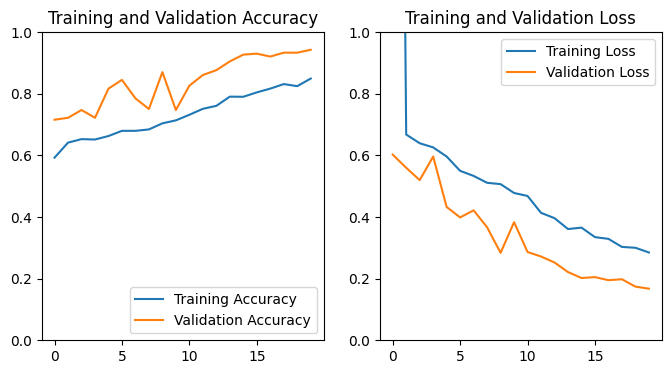

In [41]:
acc = history_simple.history['accuracy']
val_acc = history_simple.history['val_accuracy']

loss = history_simple.history['loss']
val_loss = history_simple.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim(0,1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

1. Training and Validation Accuracy (Left Plot)
- This plot displays how the model's accuracy changes over time (epochs) for both the training set and the validation set.
- Training Accuracy (blue line): This shows the model's accuracy on the training data across epochs. The upward trend indicates that the model is learning from the training data.
- Validation Accuracy (orange line): This represents how well the model performs on unseen (validation) data. The validation accuracy generally rises along with training accuracy, indicating that the model is generalizing well.
- The fact that both curves increase and follow a similar trend suggests the model is learning effectively without major overfitting.
2. Training and Validation Loss (Right Plot)
- This plot shows the loss (a measure of error) for both training and validation sets over time.
- Training Loss (blue line): This is the model's loss on the training data. The loss decreases as the model improves its predictions on the training data.
- Validation Loss (orange line): This shows how well the model performs on validation data. It also decreases, which indicates the model is likely not overfitting, as the validation loss is decreasing along with the training loss.
- Both losses gradually decline over time, which is usually a good indicator that the model is learning effectively.

Summary

Overall, these plots suggest that the model is learning and generalizing well. The similar trends in training and validation metrics (both accuracy and loss) indicate a healthy training process with no significant overfitting or underfitting.

1d. Train the pretrained data using 20 epochs

In [24]:
# Train the transfer learning model
history_transfer = model_transfer.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 454ms/step - accuracy: 0.7801 - loss: 0.4363 - val_accuracy: 0.6435 - val_loss: 1.2887
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9792 - loss: 0.0618 - val_accuracy: 0.7666 - val_loss: 0.7201
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9956 - loss: 0.0174 - val_accuracy: 0.8707 - val_loss: 0.4367
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.9932 - loss: 0.0173 - val_accuracy: 0.8612 - val_loss: 0.5395
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.8107 - val_loss: 0.8187
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8454 - val_loss: 0.6820
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9054 - val_loss: 0.3993
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accura

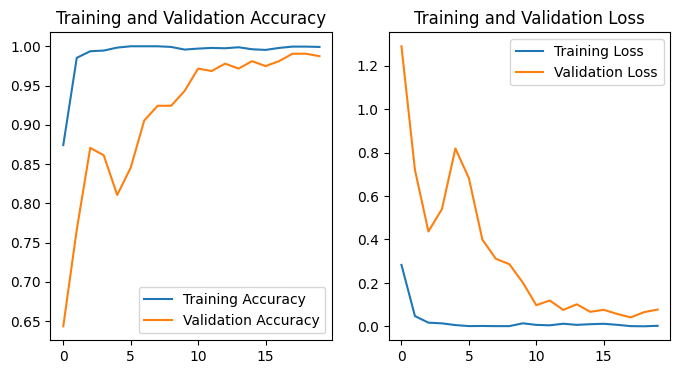

In [25]:
acc = history_transfer.history['accuracy']
val_acc = history_transfer.history['val_accuracy']

loss = history_transfer.history['loss']
val_loss = history_transfer.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1. Training and Validation Accuracy (Left Plot)
- Training Accuracy (blue line): The model quickly achieves a high accuracy on the training data, reaching almost 1.0 (100%) within the first few epochs. This is a sign that the model fits the training data extremely well.
- Validation Accuracy (orange line): The validation accuracy also increases rapidly at first and then levels off close to the training accuracy. It appears to stabilize at a high value, slightly below the training accuracy.
- This high accuracy on both training and validation sets suggests that the model is performing well, but the near-perfect training accuracy could indicate potential overfitting. However, since the validation accuracy remains high and close to the training accuracy, the model is likely generalizing reasonably well to unseen data.

2. Training and Validation Loss (Right Plot)
- Training Loss (blue line): The training loss decreases rapidly and approaches zero. This indicates that the model is minimizing error on the training data very effectively.
- Validation Loss (orange line): The validation loss also decreases initially but does not go as low as the training loss, stabilizing slightly above it. There are fluctuations early on, suggesting some instability in generalization at the beginning, but it eventually stabilizes.
- The low validation loss in comparison to the training loss suggests a reasonable fit. However, the training loss approaching zero while validation loss remains slightly higher could indicate mild overfitting.

Summary

The model performs very well on both training and validation sets, with high accuracy and low loss on both. The slight gap between training and validation performance could suggest a minor degree of overfitting, but overall, the model generalizes well to validation data. You might consider slight regularization if further generalization is needed, but this model's performance is already quite strong.

1e. Performance Result

In [16]:
# Evaluate on the test set
def evaluate_model(model, generator):
    true_labels = []
    predictions = []

    # Loop through the dataset to collect all true labels and predictions
    for batch in generator:
        images, labels = batch
        true_labels.extend(labels.numpy())
        batch_predictions = (model.predict(images) > 0.5).astype("int32")
        predictions.extend(batch_predictions)

    print(classification_report(true_labels, predictions))

In [42]:
# Evaluate both models
print("Evaluating Simple CNN Model:")
evaluate_model(model_simple, test_generator)

Evaluating Simple CNN Model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       188
         1.0       0.91      0.97      0.94       287

    accuracy                           0.92       475
   macro avg       0.93      0.91      0.92       475
weighted avg       0.93      0.92      0.92       475



Interpretation

- Class 1.0 (with a higher support of 287) has higher recall (0.97), suggesting the model is very good at identifying instances of class 1.0.
- Class 0.0 has slightly lower recall (0.86), which could mean the model misses some instances of this class (false negatives).
- Overall Performance: With an accuracy of 92%, the model performs well for both classes, but it slightly favors class 1.0 in terms of recall.

In [26]:
print("Evaluating Transfer Learning Model:")
evaluate_model(model_transfer, test_generator)

Evaluating Transfer Learning Model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       181
         1.0       0.99      0.99      0.99       294

    accuracy                           0.99       475
   macro avg       0.99      0.99      0.99       475
weighted avg       0.99      0.99      0.99       475



Interpretation

- High Accuracy and Consistency: The pretrained model performs exceptionally well across both classes, achieving nearly perfect precision, recall, and F1-scores. This suggests that the model is extremely accurate and consistent in identifying both classes.
- Balanced Performance: Both classes achieve nearly identical precision, recall, and F1-scores, which is ideal, especially in cases of slight class imbalance.
- No Signs of Overfitting: Since both classes have high recall and precision, the model does not appear to be biased or overfitted. The high accuracy across classes suggests the model generalizes well to the test data.